In this project we are given with a raw data containing certain features on determining whether the dependent variable is diabetic or non-diabetic based of the previous research
lets perform EDA and essential feature engineering in identifing the important features.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 


In [3]:
Diabetes=pd.read_excel('Downloads/pima-indians-diabetes (2).xlsx',header=None)
df=Diabetes.copy()

creating a copy of the data set header as none so that it dosent consider first row as header

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


Lets name the features from the provided information.

In [5]:
df.columns=[' Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','Diabetes Pedigree Function','AGE','Target']

In [6]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,AGE,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


To get a basic understanding of what the data tells us lets do some simple analysis.

In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,AGE,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.dtypes

 Pregnancies                  float64
Glucose                       float64
Blood Pressure                float64
Skin Thickness                float64
Insulin                       float64
BMI                           float64
Diabetes Pedigree Function    float64
AGE                           float64
Target                        float64
dtype: object

In [10]:
df.isnull().sum()

 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
AGE                           0
Target                        0
dtype: int64

The data consist of 8 features and 768 records.we can see that all features are numerical ,some features like Glucose,Blood Pressure,Skin Thickness,Insulin,BMI has 0 values which is not possible so lets consider it as missing data .

In [11]:
df1=df.copy()
df1['Glucose'].replace(0,np.nan,inplace=True)
df1['Skin Thickness'].replace(0,np.nan,inplace=True)
df1['Insulin'].replace(0,np.nan,inplace=True)
df1['BMI'].replace(0,np.nan,inplace=True)
df1['Blood Pressure'].replace(0,np.nan,inplace=True)



Converting 0 to null values.

In [12]:
df1.isnull().mean()

 Pregnancies                  0.000000
Glucose                       0.006510
Blood Pressure                0.045573
Skin Thickness                0.295573
Insulin                       0.486979
BMI                           0.014323
Diabetes Pedigree Function    0.000000
AGE                           0.000000
Target                        0.000000
dtype: float64

We can see Insulin has 48 percent null values its better to drop it

In [13]:
df2=df1.drop('Insulin',axis=1)

<AxesSubplot:xlabel='Target', ylabel='count'>

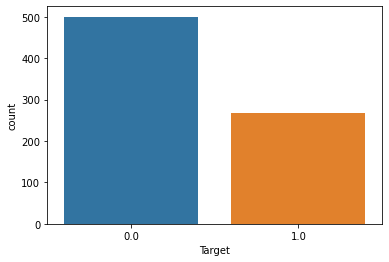

In [14]:
sns.countplot(data=df2,x=df2['Target'])

We can see that the non diabetic population is more than diabetic.

In [15]:
df2.groupby('Target')['Target'].count()/len(df2)*100

Target
0.0    65.104167
1.0    34.895833
Name: Target, dtype: float64

In [16]:
df2.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,AGE,Target
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,43.1,2.288,33.0,1.0


We have 2 population diabetic and non_diabetic lets split the data and do the analaysis for better results.

In [17]:
df_diabetes=df2[df2['Target']==1]

In [18]:
df_non_diabetes=df2[df2['Target']==0]

To find the relation between missing values lets use msno we observe that values are missing at random.

<AxesSubplot:>

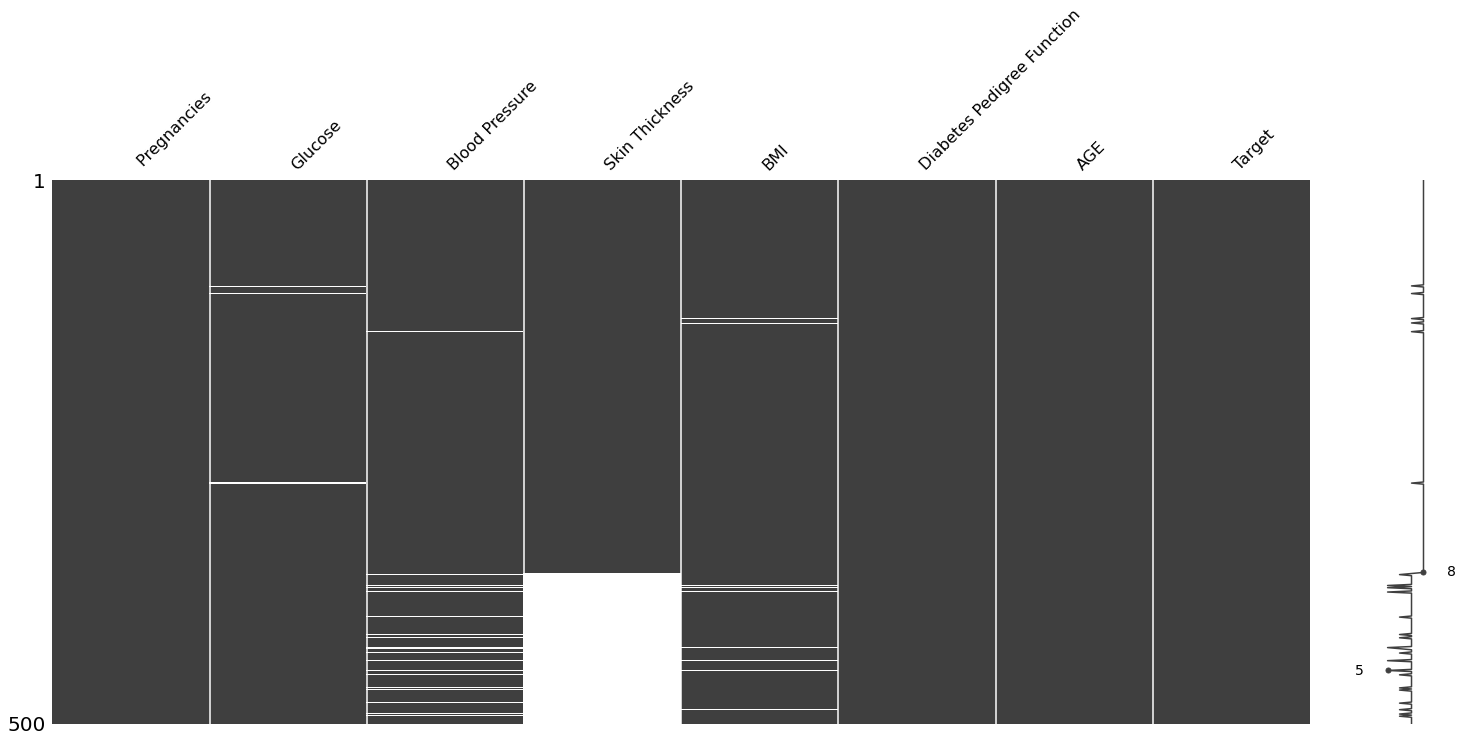

In [19]:
sorted = df_non_diabetes.sort_values('Skin Thickness')
msno.matrix(sorted)

<AxesSubplot:>

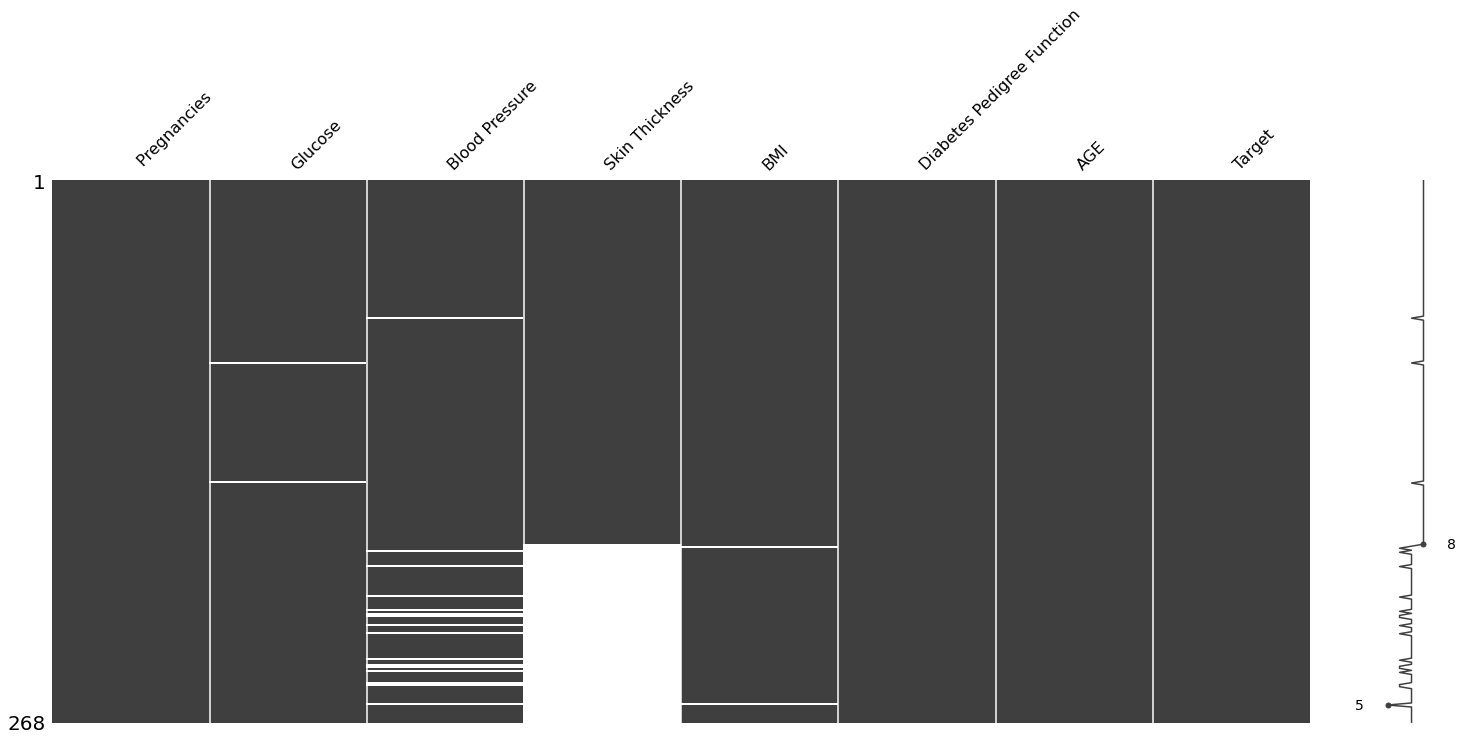

In [20]:
sorted = df_diabetes.sort_values('Skin Thickness')
msno.matrix(sorted)

To fill missing values lets try some advanced imputation as replacing it by mean and median will have less variablity

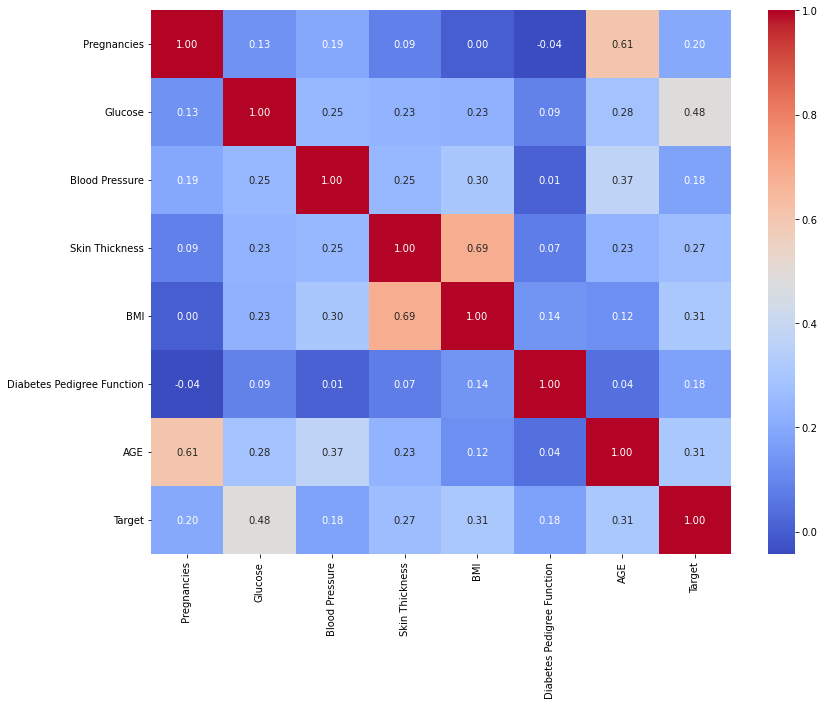

In [21]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.corr(method = "spearman"),annot=True,fmt = ".2f", cmap="coolwarm");

In [22]:
from fancyimpute import KNN
knn_imputer = KNN()
df_diabetes_knn= df_diabetes.copy(deep=True)
df_diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(df_diabetes_knn)

Imputing row 1/268 with 0 missing, elapsed time: 0.010
Imputing row 101/268 with 1 missing, elapsed time: 0.011
Imputing row 201/268 with 0 missing, elapsed time: 0.012


In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_diabetes_MICE = df_diabetes.copy(deep=True)
df_diabetes_MICE.iloc[:, :] = MICE_imputer.fit_transform(df_diabetes_MICE)

In [ ]:
nullity = df_diabetes['BMI'].isnull() + df_diabetes['Skin Thickness'].isnull()
imputation ={'KNN Imputation': df_diabetes_knn,
              'MICE Imputation': df_diabetes_MICE}

In [ ]:

for df_key in imputation:
    imputation[df_key].plot(x='Skin Thickness', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow',
                             colorbar=False, title=df_key)
    plt.show()

We see that Knn shows more varablity compared to mice in sample with diabetes lets go with knn.Now lets impute for non diabetes population.

In [ ]:
from fancyimpute import KNN
knn_imputer = KNN()
df_non_diabetes_knn= df_non_diabetes.copy(deep=True)
df_non_diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(df_non_diabetes_knn)

In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_non_diabetes_MICE = df_non_diabetes.copy(deep=True)
df_non_diabetes_MICE.iloc[:, :] = MICE_imputer.fit_transform(df_non_diabetes_MICE)

In [ ]:
nullity = df_non_diabetes['BMI'].isnull() + df_non_diabetes['Skin Thickness'].isnull()
imputation ={'KNN Imputation': df_non_diabetes_knn,
              'MICE Imputation': df_non_diabetes_MICE}

In [ ]:
for  df_key in imputation:
    imputation[df_key].plot(x='Skin Thickness', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow',
                             colorbar=False, title=df_key)

For Non-diabetes Population Knn performes better hence lets go with Knn for replacing the missing values.

In [ ]:
df_diabetes_notnull=df_diabetes_knn.copy()
df_non_diabetes_notnull=df_non_diabetes_knn.copy()

Lets visualize the fetures to get better understanding of the data.

In [ ]:
l=[i for i in df_diabetes_notnull.columns if i!='Target']
l

creating a list of continious variable.

In [ ]:
df_diabetes_notnull.info()

In [ ]:
df_diabetes_notnull.describe()

In [ ]:
for i in l :
    sns.histplot(data=df_diabetes,x=df_diabetes_notnull[i],kde=True)
    plt.axvline(x=df_diabetes_notnull[i].mean(),color='red',alpha=0.5,label='Mean')
    plt.axvline(x=df_diabetes_notnull[i].median(),c='blue',ls='--',alpha=0.5,label='Median')
    plt.legend()
    plt.show()

In [ ]:
for i in l:
    sns.boxplot(data=df_diabetes_notnull,y=df_diabetes_notnull[i])
    plt.show()

We see outlier in majority of the features.

In age we see max value as 70 its just a variant as for the other features we do not have the domain knowledge to understand its just a variant or an outlier.Let me drop the outlier for now.

creating a function find_skewed_boundaries to determain the outlier based on IQR.

In [ ]:
def find_skewed_boundaries(df, variable, distance):


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
df_diabetes_dropout=df_diabetes_notnull.copy()

In [ ]:
for i in l:
    (upper,lower)=find_skewed_boundaries(df_diabetes_dropout,i,1.5)
    df_diabetes_dropout[i] = np.where(df_diabetes_dropout[i] >upper,np.nan,df_diabetes_dropout[i])
    
    df_diabetes_dropout[i] = np.where(df_diabetes_dropout[i] <lower,np.nan,df_diabetes_dropout[i])


In [ ]:
df_diabetes_dropout.head()

In [ ]:
df_diabetes_dropout.isnull().sum()

In [ ]:
df_diabetes_dropout_true=df_diabetes_dropout.dropna()

In [ ]:
for i in l :
    sns.histplot(data=df_diabetes_dropout_true,x=df_diabetes_dropout_true[i],kde=True)
    plt.axvline(x=df_diabetes_dropout_true[i].mean(),color='red',alpha=0.5,label='Mean')
    plt.axvline(x=df_diabetes_dropout_true[i].median(),c='blue',ls='--',alpha=0.5,label='Median')
    plt.legend()
    plt.show()

BMI,Skin thickness,blood Pressure follow normal distribution.

Lets perform the same on Non-diabities

In [ ]:
for i in l :
    sns.histplot(data=df_non_diabetes,x=df_non_diabetes_notnull[i],kde=True)
    plt.axvline(x=df_non_diabetes_notnull[i].mean(),color='red',alpha=0.5,label='Mean')
    plt.axvline(x=df_non_diabetes_notnull[i].median(),c='blue',ls='--',alpha=0.5,label='Median')
    plt.legend()
    plt.show()

In [ ]:
for i in l:
    sns.boxplot(data=df_non_diabetes_notnull,y=df_diabetes_notnull[i])
    plt.show()

In [ ]:
df_non_diabetes_dropout=df_non_diabetes_notnull.copy()

Lets remove the outlier using IQR.

In [ ]:
for i in l:
    (upper,lower)=find_skewed_boundaries(df_non_diabetes_dropout,i,1.5)
    df_non_diabetes_dropout[i] = np.where(df_non_diabetes_dropout[i] >upper,np.nan,df_non_diabetes_dropout[i])
    
    df_non_diabetes_dropout[i] = np.where(df_non_diabetes_dropout[i] <lower,np.nan,df_non_diabetes_dropout[i])



In [ ]:
df_non_diabetes_dropout_true=df_non_diabetes_dropout.dropna()
df_non_diabetes_dropout_true.head()

In [ ]:
df_non_diabetes_dropout_true.describe()

In [ ]:
for i in l :
    sns.histplot(data=df_non_diabetes_dropout_true,x=df_non_diabetes_dropout_true[i],kde=True)
    plt.axvline(x=df_non_diabetes_dropout_true[i].mean(),color='red',alpha=0.5,label='Mean')
    plt.axvline(x=df_non_diabetes_dropout_true[i].median(),c='blue',ls='--',alpha=0.5,label='Median')
    plt.legend()
    plt.show()

Glucose,blood pressure,skin thickness,bmi are symmetric age and dpf are skewed

Lets concat the both data frame 

In [ ]:
df_main=pd.concat([df_non_diabetes_dropout_true,df_diabetes_dropout_true]);

In [ ]:
df_main

In [ ]:
for i in l :
    sns.histplot(data=df_main,x=df_main[i],kde=True)
    
    plt.show()

In [ ]:
for i in l :
    sns.histplot(data=df_main,x=df_main[i],hue=df_main['Target'])
    plt.show()

In [ ]:
for i in l:
    sns.boxplot(data=df_main,y=df_main[i],x=df_main['Target'])
    plt.show()

BMI,skin thickness,blood pressure follow normal distribution lets perform some transformation on other features to make it normal.some feature seems to influence the outcome.

In [ ]:
#Diabetes Pedigree Function is possitively skewed lets perform log transformation
df_trans=df_main.copy()

In [ ]:
df_trans['dpf']=np.log(df_trans['Diabetes Pedigree Function'])
df_trans['age']=np.log(df_trans['AGE'])

In [ ]:
df_trans

In [ ]:
for i in ['age','dpf']:
    sns.histplot(data=df_trans,x=df_trans[i],kde=True)
    plt.axvline(x=df_trans[i].mean(),color='red',alpha=0.5,label='Mean')
    plt.axvline(x=df_trans[i].median(),c='blue',ls='--',alpha=0.5,label='Median')
    plt.show()
   

After transformation we are not able to convert to normal distribution.

In [ ]:
sns.pairplot(data=df_main, vars=[" Pregnancies","Glucose","Blood Pressure","Skin Thickness", "BMI","Diabetes Pedigree Function", "AGE"],hue="Target")
plt.title("Pairplot of Variables by Outcome");

From the above scatter plot BMI,skin thickness and pregnancies,age has positive linear relationships.lets check with heat map.


In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df_main.corr(method = "spearman"),annot=True,fmt = ".2f", cmap="coolwarm");

No two factors have strong linear relationships.
Age,Pregnancies and BMI,SkinThickness have moderate positive linear relationship.